

```
Nomes: José Jorge Bazaga Junior, Guilherme Rodrigues Feijó
```



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [182]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
df = pd.read_csv(url, names=colnames)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [183]:
#remove linhas com NAN
df = df.dropna()
#descricão statistisca
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[]

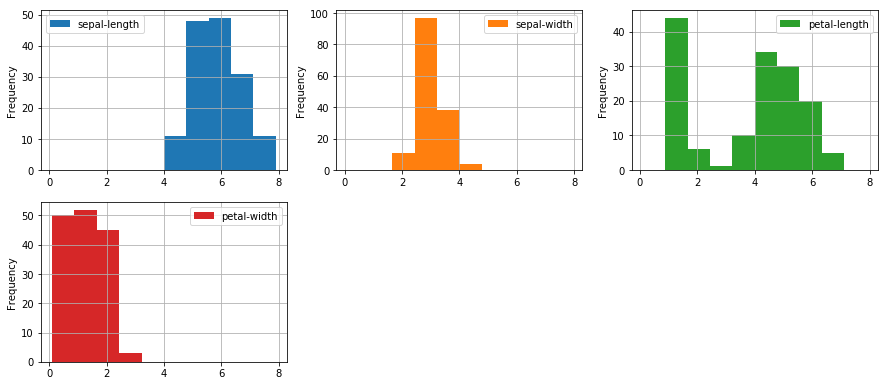

In [185]:
df.plot(kind='hist', figsize=(15, 10), subplots=True, sharex=False, layout=(3, 3), grid=True)
plt.plot()

[]

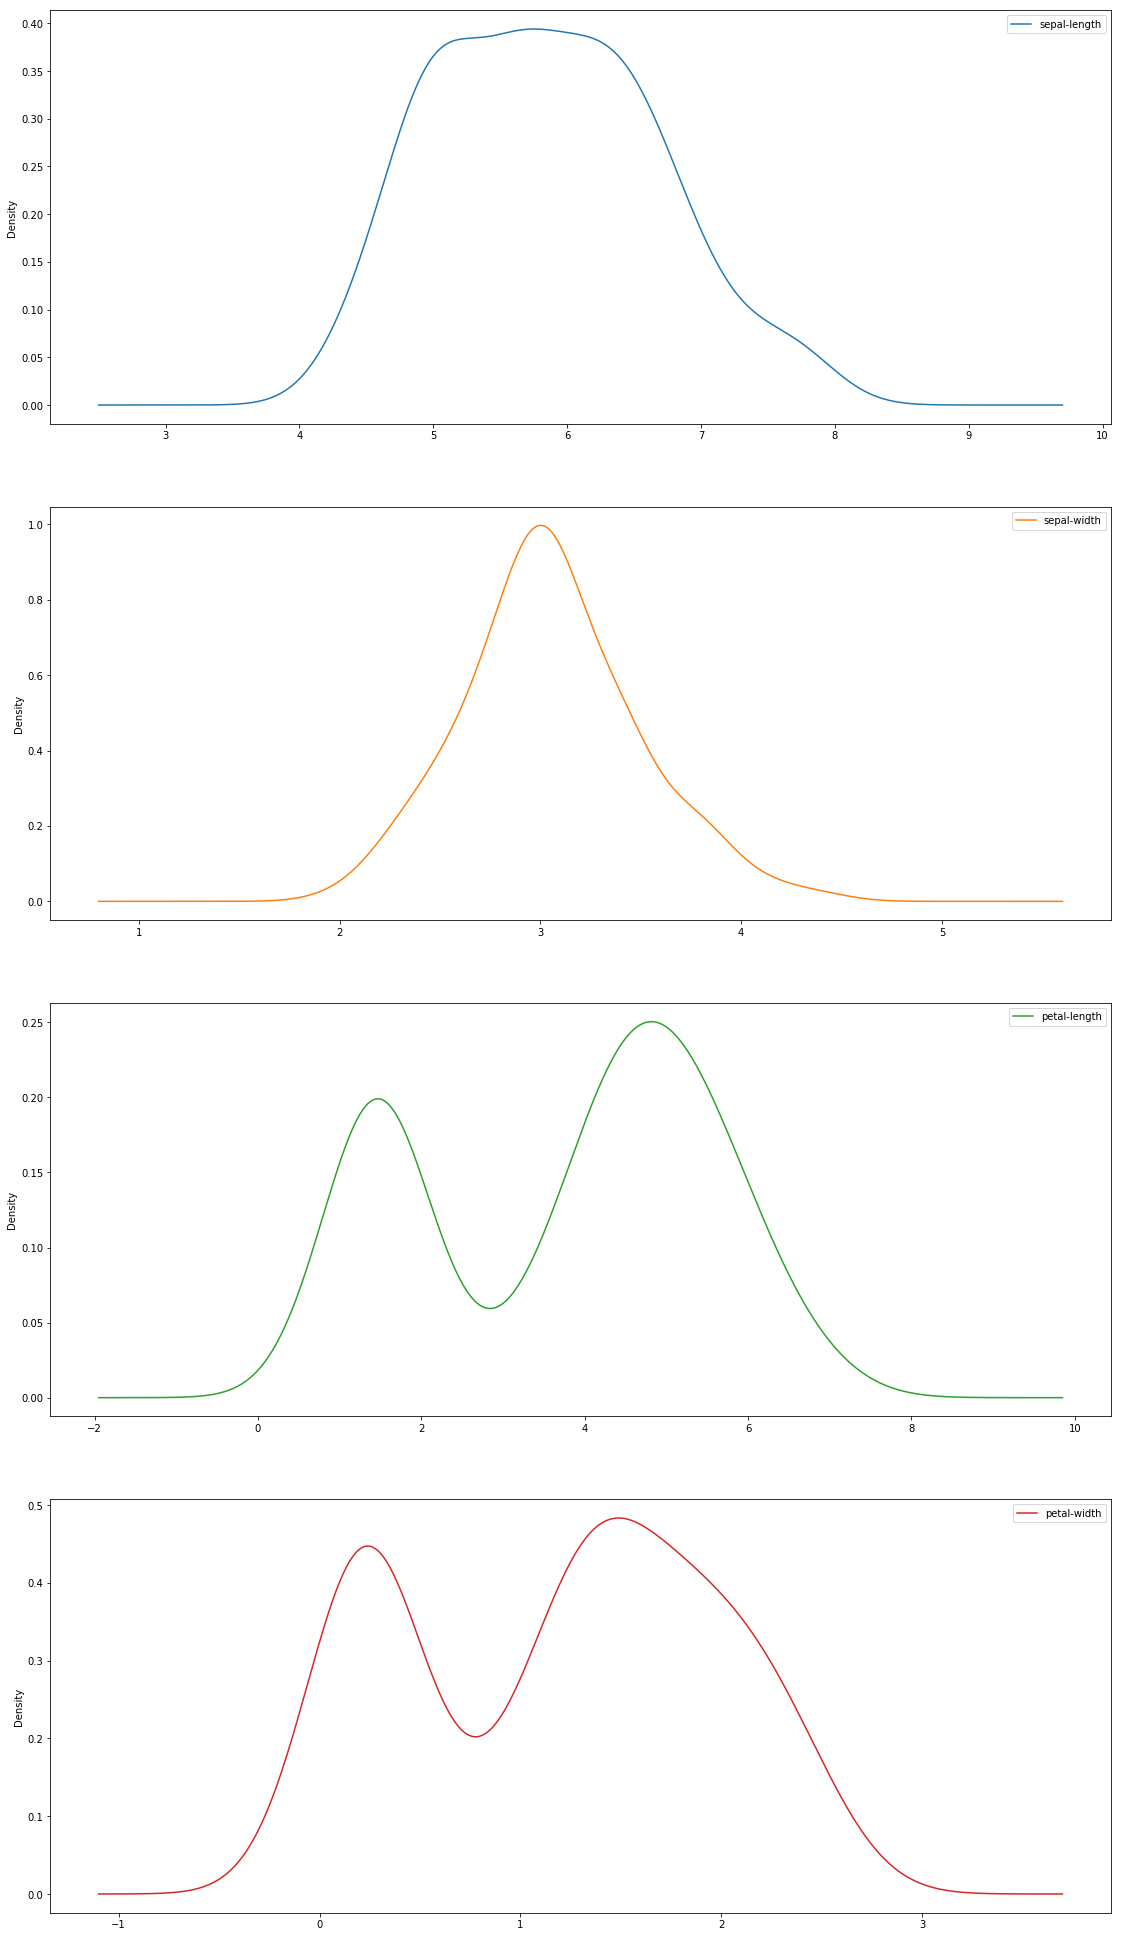

In [186]:
df.plot(kind='kde', figsize=(19, 35), subplots=True, sharex=False)
plt.plot()

In [187]:
skew = df.skew()
skew

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64

In [188]:
curtosis = df.kurtosis()
curtosis

sepal-length   -0.552064
sepal-width     0.290781
petal-length   -1.401921
petal-width    -1.339754
dtype: float64

In [189]:
curtosis = df.cov()
curtosis

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,0.685694,-0.039268,1.273682,0.516904
sepal-width,-0.039268,0.188004,-0.321713,-0.117981
petal-length,1.273682,-0.321713,3.113179,1.296387
petal-width,0.516904,-0.117981,1.296387,0.582414


In [190]:
corr = df.corr('pearson')
corr

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [191]:
corr_spearman = df.corr('spearman')
corr_spearman

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.159457,0.881386,0.834421
sepal-width,-0.159457,1.000000,-0.303421,-0.277511
petal-length,0.881386,-0.303421,1.000000,0.936003
petal-width,0.834421,-0.277511,0.936003,1.000000


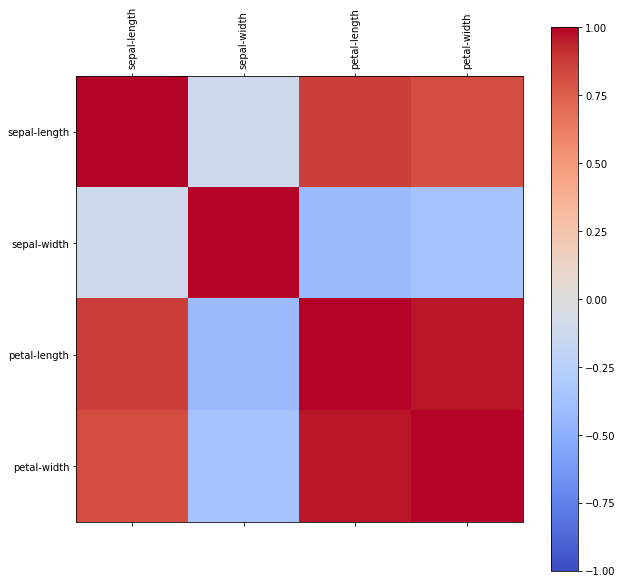

In [216]:
# Criar figura com tamanho especificado
fig = plt.figure(figsize=(10, 10))

# Adicionar um eixo na figura
ax = fig.add_subplot(111)
df_sem_class = df.drop('Class', axis=1)
features = df_sem_class.columns
num_features = len(features)

# Criar a matriz de exibição
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1, extent=[0, num_features, 0, num_features])

# Cria uma barra mostrando o significado das cores
fig.colorbar(cax)

# Ajustar posição dos ticks
ax.set_xticks(np.arange(.5, num_features))
ax.set_yticks(np.arange(.5, num_features)) 

# Dar nomes aos ticks
ax.set_xticklabels(features, rotation=90)
ax.set_yticklabels(features[::-1])

# Exibir imagem
plt.show()

In [0]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.92        38
      macro avg       0.93      0.93      0.93        38
   weighted avg       0.92      0.92      0.92        38



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


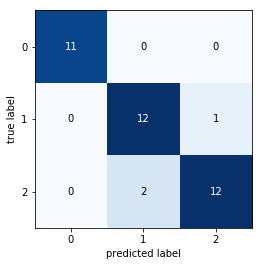

In [209]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
                 
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
mc = confusion_matrix(y_test, y_pred)
fig = plot_confusion_matrix(conf_mat=mc)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        13
Iris-versicolor       0.26      1.00      0.42        10
 Iris-virginica       0.00      0.00      0.00        15

       accuracy                           0.26        38
      macro avg       0.09      0.33      0.14        38
   weighted avg       0.07      0.26      0.11        38



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


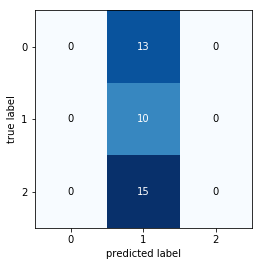

In [212]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
                 
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
mc = confusion_matrix(y_test, y_pred)
fig = plot_confusion_matrix(conf_mat=mc)
print(classification_report(y_test, y_pred))